<a href="https://colab.research.google.com/github/fares-3adi/FraudDetectionProject/blob/main/CS3IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection Using Machine Learning**

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

## Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Link to Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df = pd.read_csv("creditcard.csv")

For reference: The column names are Time, V1 ... V28, Amount, and Class

## Performing Data Analysis

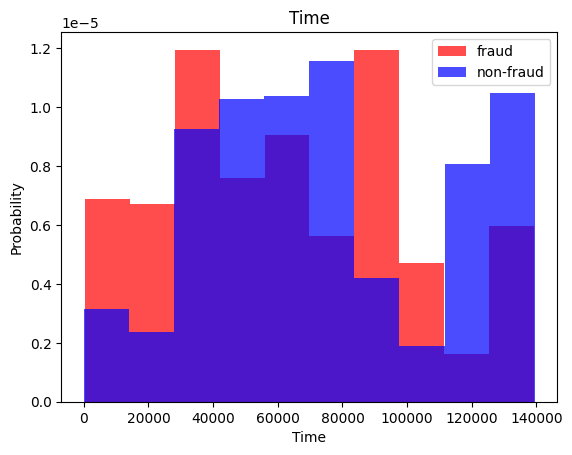

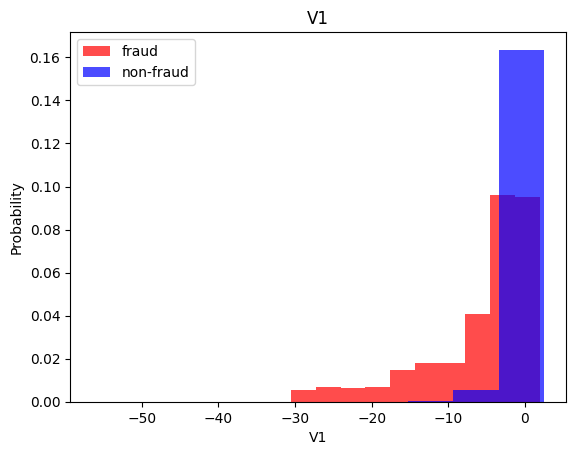

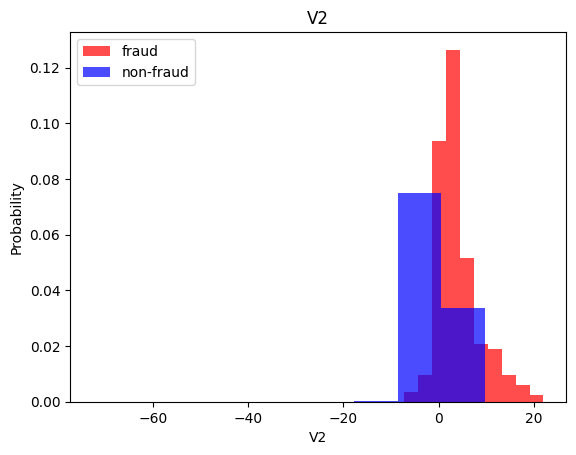

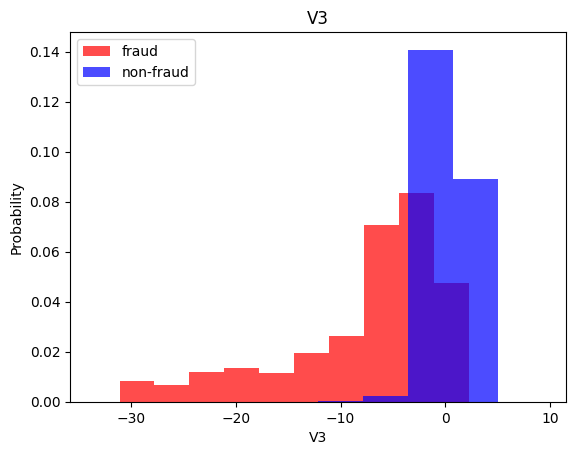

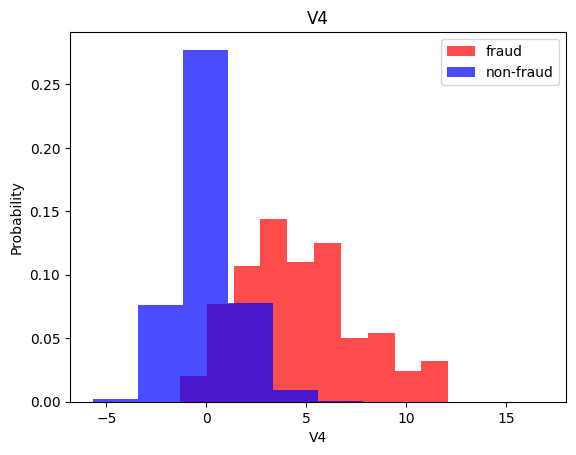

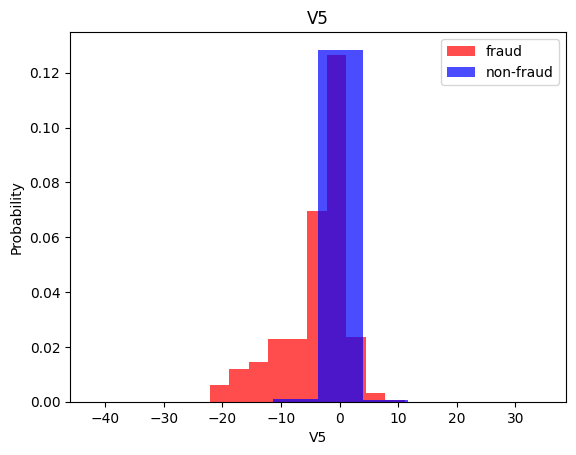

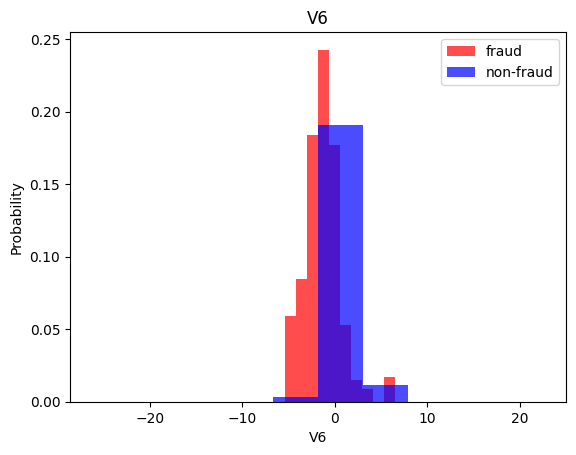

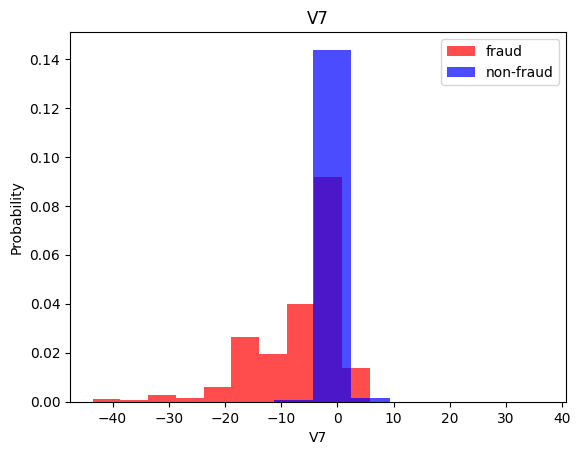

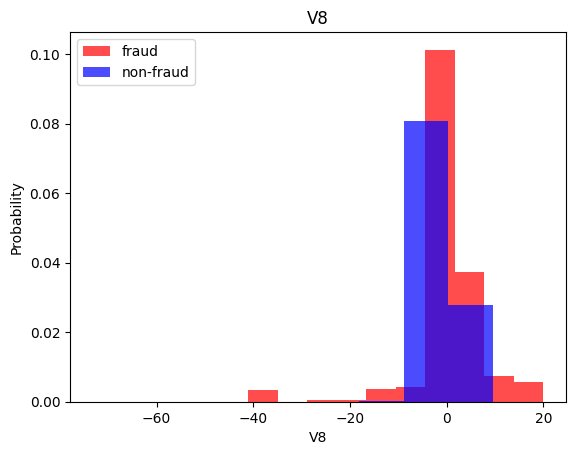

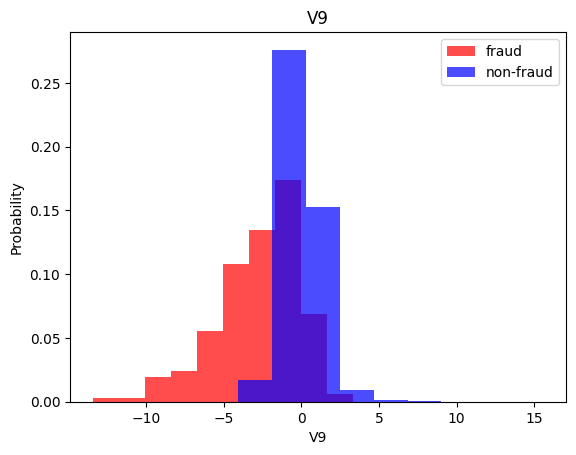

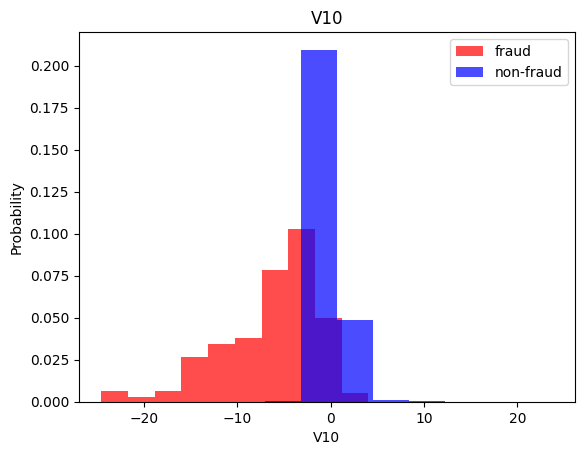

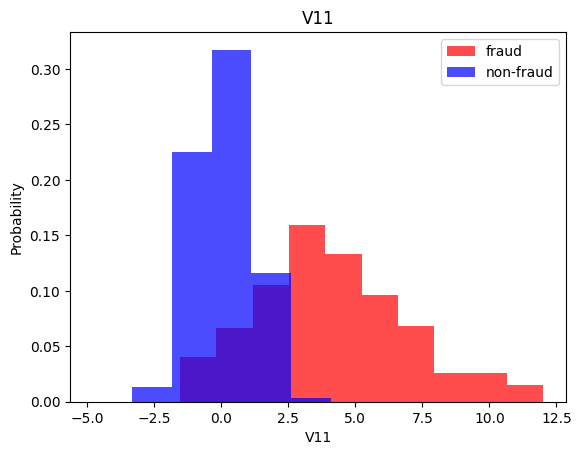

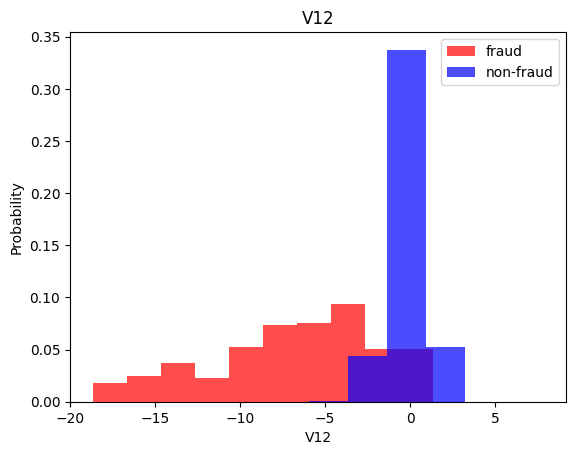

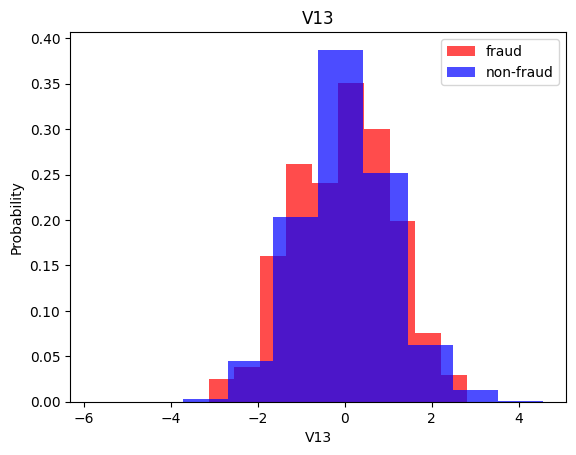

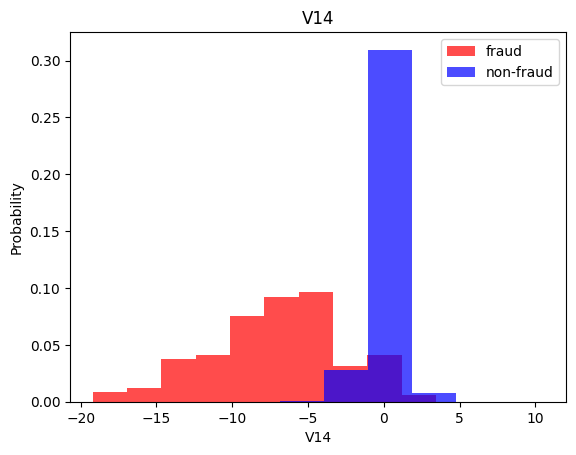

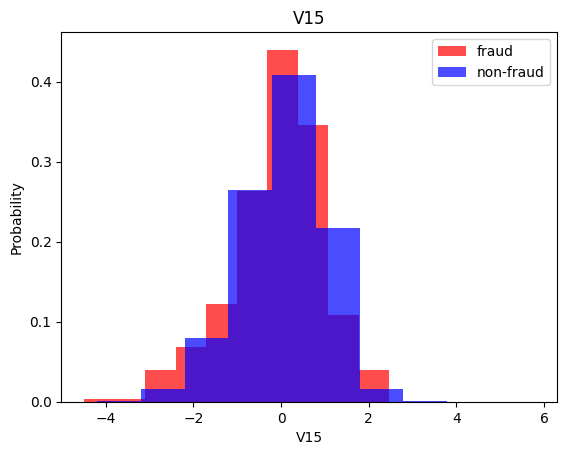

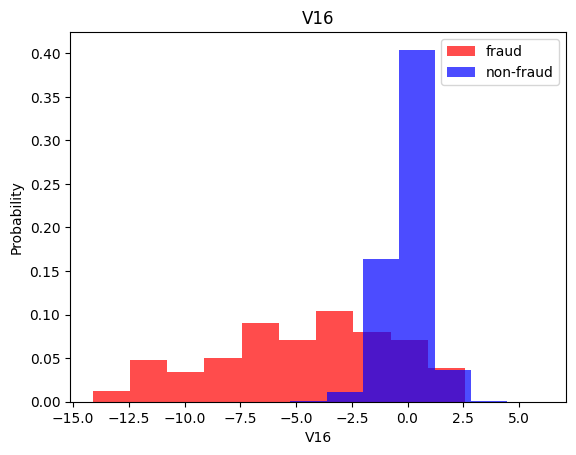

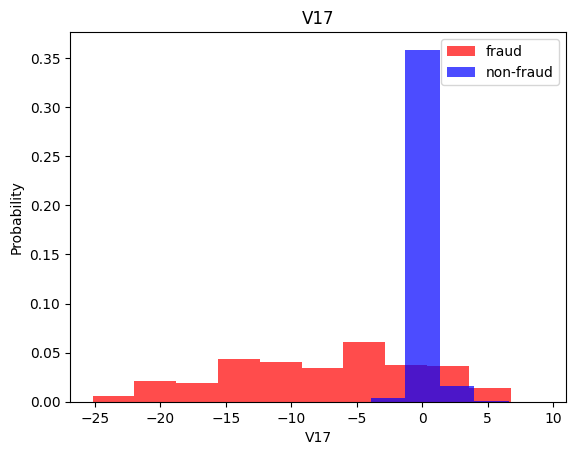

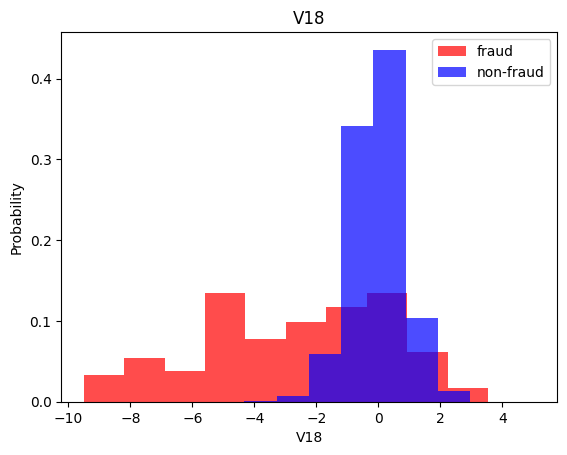

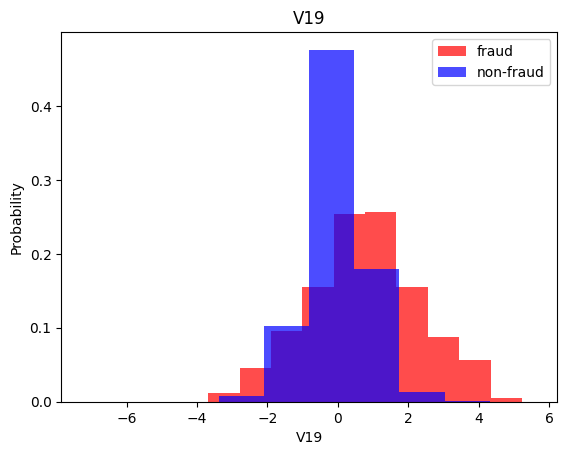

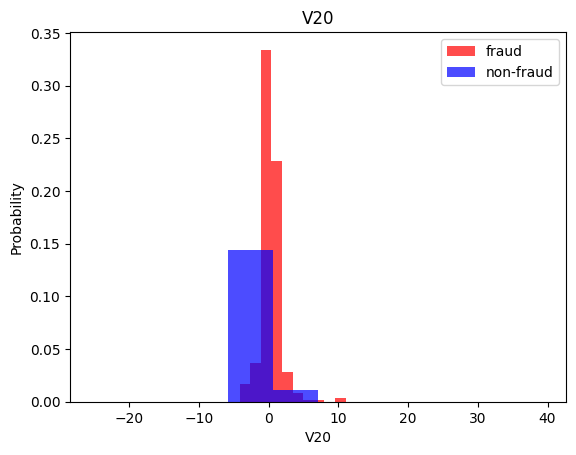

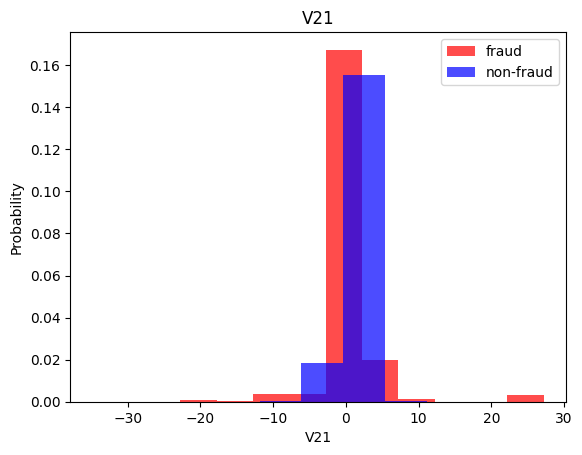

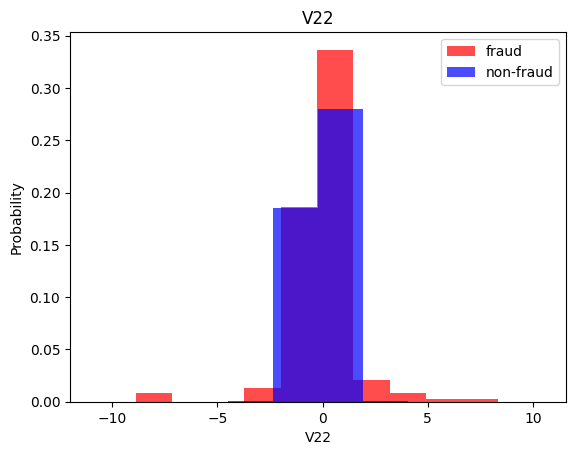

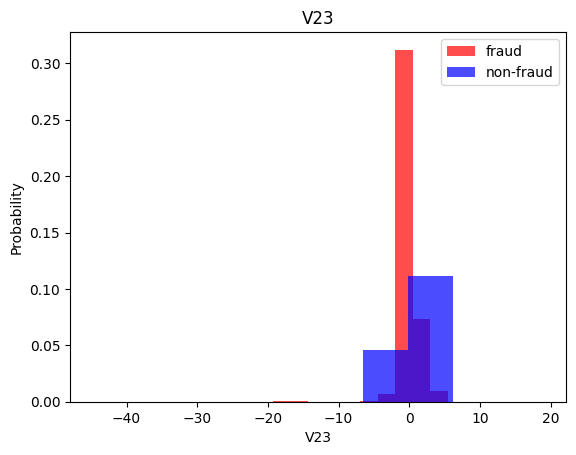

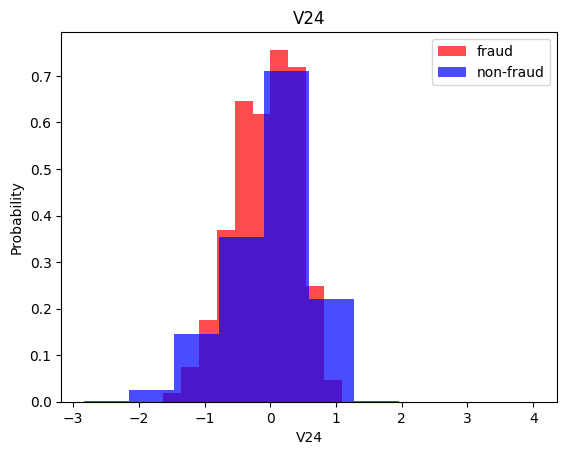

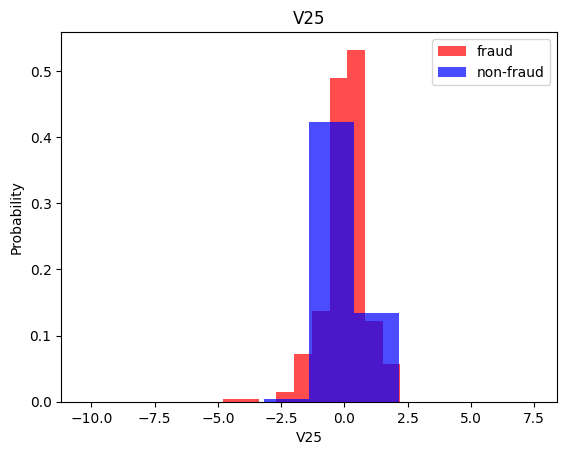

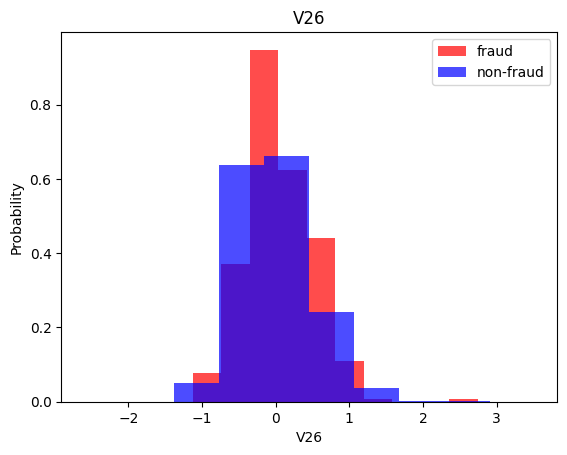

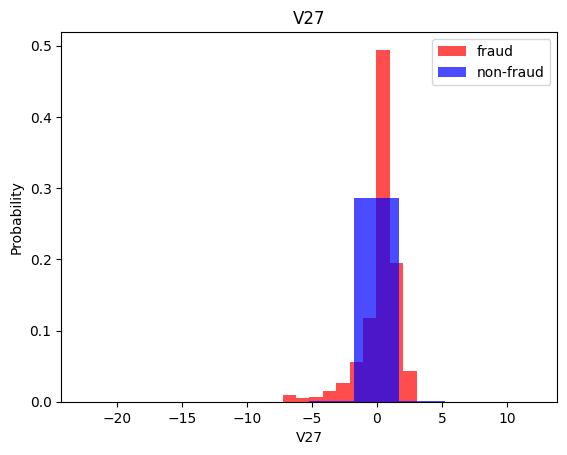

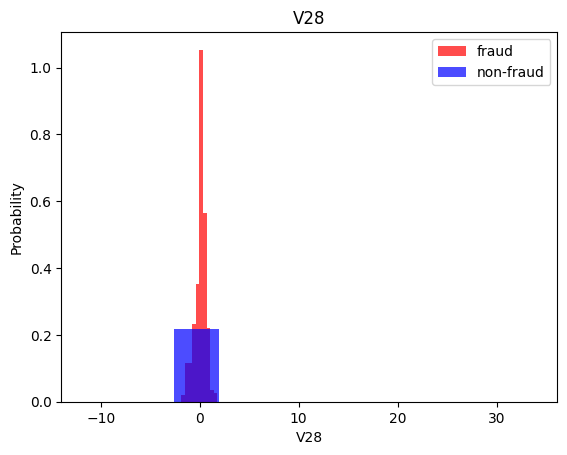

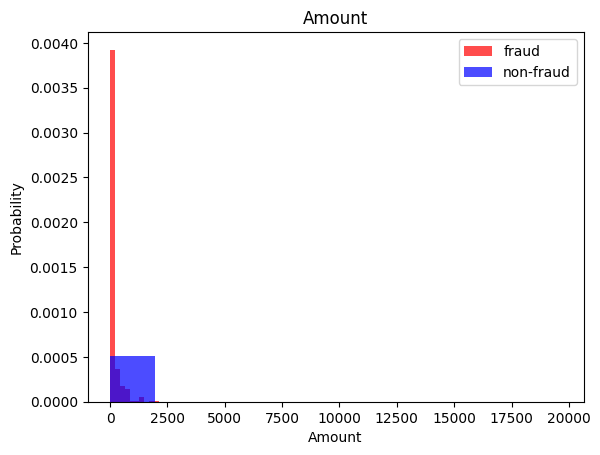

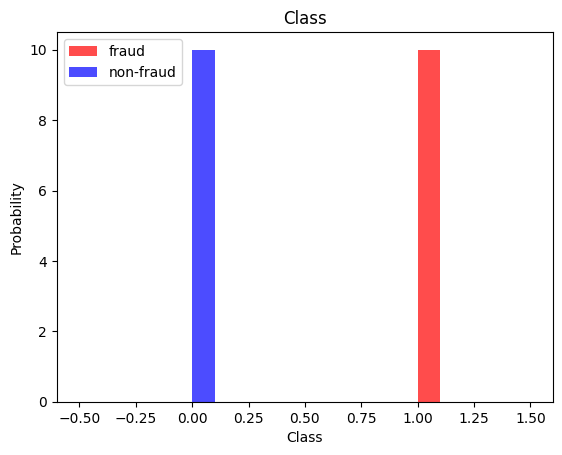

In [ ]:
# Plotting a histogram for each label (fraud and non-fraud)
# To facilitate data analysis for the effect of features on the label
for label in df.columns:
  plt.hist(df[df["Class"]==1][label], color="red", label="fraud", alpha=0.7, density=True)
  plt.hist(df[df["Class"]==0][label], color="blue", label="non-fraud", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [ ]:
# To detect whether there are null values in the data set
df.isnull().sum().max()
# In this case there are no null values meaning we do not
# have to employ any techniques to fill in missing data

1

In [ ]:
# To better understand the split between the two classes
df.shape

(213969, 31)

In [ ]:
# Splitting those entries based on class
df['Class'].value_counts()

,count
Class,
0.0,213570
1.0,398


This shows a total of 492 fraud cases out of a total of 284807 entries.

In [ ]:
# To further analyze the percentage of fraud cases
print(f"Percentage of Fraud (Class==1): {df['Class'].value_counts()[0]/len(df) * 100}%")
print(f"Percentage of Non-Fraud (Class==0): {df['Class'].value_counts()[1]/len(df) * 100}%")

Percentage of Fraud (Class==1): 99.81352438904702%
Percentage of Non-Fraud (Class==0): 0.18600825353205372%


It shows that only 0.172% of the dataset contains cases of fraud, while 99.82% is not fraud (values may vary to a few d.p)

This means the dataset is heavily skewed and that will need to be dealt with.

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


As can be seen from this sample of the dataset, columns V1 to V28 have been scaled, the only expceptions of scaling being the Time column and the Amount column.

We should now work on scaling the Time and Amount columns appropriately.

## Splitting the Dataset and Oversampling
In this step we will split the dataset into a training set, validation set, and testing set

We will then scale the Time and Amount features of the dataset because only the V1 to V28 features are scaled properly

Then we will oversample the training dataset in order to bypass the class imbalance problem discovered from the data analysis above (only 0.172% of the dataset being classified as fraud)


In [ ]:
# Splitting data set into training, validation and testing
training_set, validation_set, testing_set = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


The line of code above splits the dataset into a training set, validation set and testing set. The split is done in the following ratio:

*   0-60%: Training
*   60-80%: Validation
*   80-100% of Dataset: Testing




Defining a function to scale (Using Standard Scaler for now) the Time and Amount columns for a given dataset.

We only scale those two columns as the rest of the features in the dataset (Features V1 to V28) are already scaled.

In [ ]:
# Function scale Time and Amount columns of a dataset
def scale_dataset(dataset, oversample=False):
    # Splitting the features from the target
    X = dataset.iloc[:, :-1]  # all feature colmuns
    y = dataset.iloc[:, -1].values  # the class label (last column)

    # Starting a standard scaler
    scaler = StandardScaler()

    # fitting scaler to only the time and amount features
    # as the other features are already scaled
    X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

    # Checking if oversampling is true
    if oversample == True:
      random_oversampler = RandomOverSampler(random_state=42)
      X, y = random_oversampler.fit_resample(X, y)

    # Converting back to numpy array
    X_scaled = X.values

    # Combining features and target to 2d numpyy array
    scaled_data = np.hstack((X_scaled, np.reshape(y, (-1, 1))))

    return scaled_data, X_scaled, y

Running the function on each dataset (Testing, Validation and Testing sets)

In [ ]:
# For training set
train_data, X_train, y_train = scale_dataset(training_set, oversample=True)

# For validation set
validation_data, X_validation, y_val = scale_dataset(validation_set, oversample=False)

# For testing set
test_data, X_test, y_test = scale_dataset(testing_set, oversample=False)